<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">



# <center> **14. Non Supervised Learning** </center>

##  **Outline**
1. [**Unsupervised learning**](#eje1)
2. [**Kmeans algorithm**](#eje2)
3. [**DBscan algorithm**](#eje3)
4. [**The PCA: Unsupervised for Supervised learning**](#eje4)


<span style="font-size:larger;"> *Yan Lecun, director of AI research, explains that unsupervised learning — teaching machines to learn for themselves without having to be explicitly told if everything they do is right or wrong — is the key to “true” AI.*[3] </span>

In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "H2" #@param {type:"string"}
assignment_id = 'ai1-'+group_id +'.20212.python'
code_subject = '1'
student_id = "2210" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name', 'course_name', 'student_id'])
config = Config(server_name='https://azuregrader.azurewebsites.net/api', 
                course_name='ai1', student_id='2162107')


def check_solution(assignment_id, student_func_str):

    # Set the endpoint and payload.
    payload = {'func_str': student_func_str, 'assignment_id': assignment_id}
    endpoint_url = config.server_name + '/CheckSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.get(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "course-AI/ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-AI/ai-uis-student


In [2]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from sklearn.datasets import *
sns.set_theme()
pd.__version__

'1.3.5'

# **1. Understanding Unsipervised Learning** <a name="eje1"></a>


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/NonSupervised.png" alt="Drawing" style="width:1700px;">


## <span style="color:red"> What do you do when your dataset doesn’t have any labels?</span>: 

Unsupervised learning is when you only have input data $\mathbf{X}$ and no corresponding output variables $\mathbf{y}$. The main **goal** for unsupervised learning is **to model the underlying structure** or distribution in the data in order to learn more about the data.


- There is no correct answers and **there is no teacher**
- The goal is to dicover interesting structure **(patterns)** in the data.
- useful for
    - Big Data: Take representative samples of a lot of data
    - It is necessary to focus on understanding customers
    - To find patterns in dynamic twitter
    - To find playlist music data





<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

For instance, how to group these data?. Try with goups of $K=1,2,3,4$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/Uncluster-student.png" style="width:400px;">

#**2. K-means algorithm** <a name="eje2"></a>
### The clustering

The idea is to **discover** inherent groups in data and to recover **centroid or representative** samples.
    - Groups or clusters are set of data that share **similar** features
    - For instance find customer patterns,  such as people that buy X also tend to buy Y


**How to cluster automatically?**

R:/ The problem is computationally difficult (NP-hard)

## **K-means  O(n)**

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares


- **clustering your data points into a number (K) of mutually exclusive clusters.**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/kmeans.gif" >

-**How it works ?**


1. Initialize $K$ centroids $C = \{c_1, c_2, \ldots c_k\}$
    - The center points are vectors of the same length $c_i \in \mathbb{R}^{F}$
2. Each data point is classified by computing the distance between that point and each group center
    - $\arg \min_{c_i \in C} dist(c_i, x)^{2}$
3. Based on these classified points, we recompute the group center by taking the mean of all the vectors in the group.
    -$c_i = \frac{1}{|c_i|}\sum_{x_i \in c_i} x_i$

4. Repeat these steps for a set number of iterations or until the group centers don’t change much between iterations. 


**Go to te action ...**


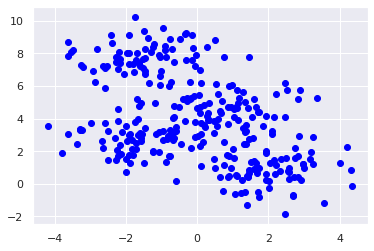

In [ ]:
#@title **code:** Load and display a emulated dataset
X, y = make_blobs(n_samples=300, centers=4, n_features=2,random_state=0)
plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow'); 

In [ ]:
#@title **code** Working with Kmeans
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  

KMeans(n_clusters=3)

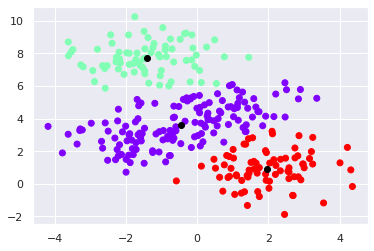

In [ ]:
#@title **code** Display Kmeans results
#print(kmeans.cluster_centers_)  
#print(kmeans.labels_)  
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

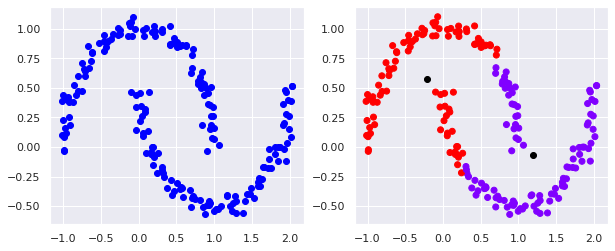

In [ ]:
#@markdown however...some of the times the k-means can **fail**....

#@markdown **code** working with other datasets
X,y = make_moons(200, noise=0.05)
kmeans = KMeans(n_clusters=2)  
kmeans.fit(X)  

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow');
plt.subplot(122) 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

### **Some Disadvantajes**

- The K is imposed (some empirical strategies are proposed as elbow (codo) aproach) [5]
- the start from random choices yield different cluster results


# **3. DBSCAN  $O(n^2)$** <a name="eje3"></a>
### **Density-Based Spatial Clustering of Applications with Noise**

It is a  density-based algorithm, in which **clusters** are set of points with **high density**. A point belongs to a cluster if it is near of neighboorhood grouped points (*del montón*). The DBSCAN find find arbitrarily sized and arbitrarily shaped clusters. DBSCAN is also able to find outlier points and label as noise.


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/DBScan.gif" >


[Visualizing DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)


-**How it works ?**
1. Define: 
    - **ε>0 :** distance to be considered a point as part of a neighborhood
    - **$c_i \geq$ minpoints :** number of point minimum to be considered as a cluster. 
2. Starts with an arbitrary non-viseted point. The neighborhood points are defined as point with a distance less or equal to a ε. Points are labelled as *visited*
    - If neighborhood is larger than **minPoints** then the group is a **cluster**
    - Otherwise, the point will be labeled as noise (later this noisy point might become the part of the cluster).

3. This procedure is repeated for all of the new points that have been just added to the cluster group.

4. This process of steps 2 and 3 is repeated until all points within the ε neighborhood of the cluster have been visited and labelled.

5. A new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise. 


**Go to the action**

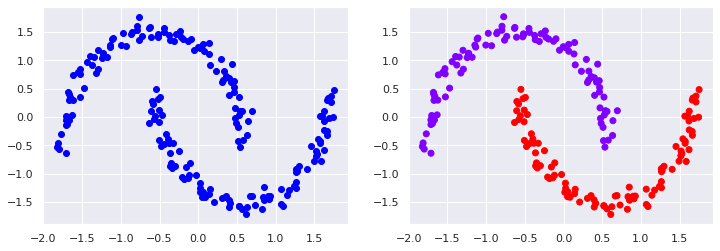

In [ ]:
#@title **code** Working with DBScan
from sklearn.preprocessing import StandardScaler

X,y = make_moons(200, noise=0.05) 
X = StandardScaler().fit_transform(X) #mean zero and variance one

DBS = DBSCAN(eps=.3)
DBS.fit(X) 

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow');
plt.subplot(122) 
plt.scatter(X[:,0],X[:,1], c=DBS.labels_, cmap='rainbow');

### **Some Disadvantajes of DBSCAN**

- Asumme similar densities on all clusters.
- Could exist some limitation to separate clusters.

## **An example: shopping trends**

- Annual Income (in thousands of dollars) 
- Spending Score (1-100) signifies how often a person spends money in a mall being the highest spender [6]. 

In [ ]:
#@title **code** Load shopping data
import pandas as pd  
customer_data = pd.read_csv('data/shopping_data.csv')  
print( customer_data.shape  )
customer_data.head(3)

(200, 5)


CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6

In [ ]:
#@title **code** load specific features
data = customer_data.iloc[:, 3:5].values  
data.shape

(200, 2)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What about use other features for clustering?  
- How genre and age are correlated?

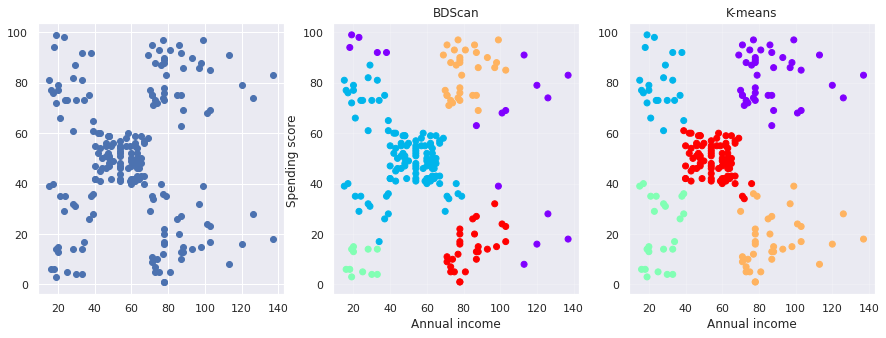

In [ ]:
#@title **code** kmeans vs DBScan
kmeans = KMeans(n_clusters=5)  
kmeans.fit(data)  

DBS = DBSCAN(eps=10)
#AgglomerativeClustering(n_clusters=2, linkage= "ward")
DBS.fit(data) 
plt.figure(figsize=(15, 5))  
plt.subplot(131)
plt.scatter(data[:,0], data[:,1], cmap='rainbow') 
plt.subplot(132)
plt.title("BDScan")
plt.xlabel("Annual income")
plt.ylabel("Spending score ")
plt.grid(alpha=0.2)
plt.scatter(data[:,0], data[:,1], c=DBS.labels_, cmap='rainbow')  
plt.subplot(133)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.xlabel("Annual income")
plt.title("K-means")
plt.grid(alpha=0.2)

In [ ]:
#@title **code student** How group w.r.t features. 







<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200"> 

- What about apply cluster an image?  
- Try in the next images

<Figure size 648x648 with 0 Axes>

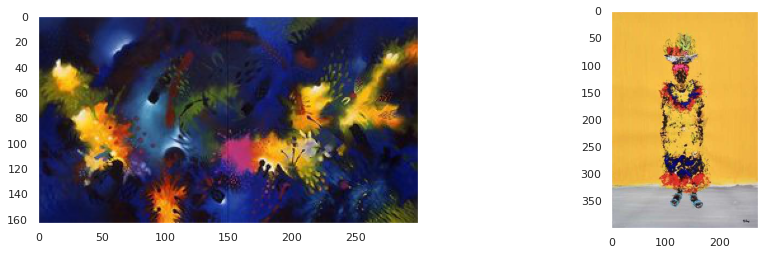

In [ ]:
#@title **code** Load and display images
from skimage import io
fig = plt.figure(figsize=(9,9))
img_1 = io.imread("imgs/jacanamijoy.jpg")
img_2 = io.imread("imgs/juanCabas.jpg")


plt.figure(figsize=(15,4))
plt.subplot(121);
plt.imshow(img_1, cmap = plt.cm.Greys_r), plt.grid();
plt.subplot(122)
plt.imshow(img_2, cmap = plt.cm.Greys_r), plt.grid();

In [ ]:
#@title **code student** solution
img = img_1
print(img.shape)




plt.figure(figsize=(15,4))
plt.subplot(141);
plt.imshow(img)
plt.subplot(142);
plt.imshow(img[:,:,0], cmap = plt.cm.gray)
plt.subplot(143);
plt.imshow(kmeans.labels_.reshape(width, height), cmap = plt.cm.get_cmap('prism'));
plt.subplot(144);
plt.imshow(DBS.labels_.reshape(width, height), cmap = plt.cm.get_cmap('prism'));

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What about normalize data?  
- what about introduce (x, y) as features?

In [ ]:
#@title **code student** other solution 






plt.figure(figsize=(15,4))
plt.subplot(141);
plt.imshow(img)
plt.subplot(142);
plt.imshow(img[:,:,0], cmap = plt.cm.gray)
plt.subplot(143);
plt.imshow(kmeans.labels_.reshape(width, height), cmap = plt.cm.get_cmap('prism'));
plt.subplot(144);
plt.imshow(DBS.labels_.reshape(width, height), cmap = plt.cm.get_cmap('prism'));

#  **4. The PCA: Unsupervised for Supervised learning**

Now, we will work on **feature extraction** from a strategy named **P**rincipal **C**omponent **A**nalysis (**PCA**).

- PCA exploit and built correlation patterns between features.
- Find the directions of maximum variance and project data over this new axis. 

From next plot: 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/PCA.png" style="width:700px;">

Which features better represent the fish?


In [ ]:
#@title **code** previous result from raw data
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import *

d = pd.read_csv("data/data_banknote_authentication.txt.gz")
X = d.values[:,:-1]
y = d.values[:,-1]
print ("X shape", X.shape)
s = cross_val_score(GaussianNB(), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

X shape (1372, 4)
accuracy 0.841 (+/- 0.02853)


In [ ]:
#@title **code**
X = d.values[:,:-1]
X = PCA(n_components=3).fit_transform(X)
print( "shape after PCA ", X.shape)
s = cross_val_score(GaussianNB(), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

shape after PCA  (1372, 3)
accuracy 0.967 (+/- 0.01431)


## **Many options with different performances...**
   ... So, as  **scientific of data**, please select the best in your application! [4]
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/comparison.png" style="width:700px;">

## **References**

[1] Scikit-learn for kmeans: http://scikit-learn.org/stable/modules/clustering.html#k-means

[2]Introduction to Unsupervised lerning: https://blog.algorithmia.com/introduction-to-unsupervised-learning/

[3] Data Science: https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03

[4] Sklearn comparison: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

[5] K-means by hand: https://mubaris.com/posts/kmeans-clustering

[6] dataset: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
